In [1]:
import pandas as pd
from math import comb
from ax.service.ax_client import AxClient
import time
import sys
import numpy as np
from ax.core.optimization_config import MultiObjectiveOptimizationConfig
from ax.core.outcome_constraint import OutcomeConstraint, ComparisonOp



sys.path.append('../')
import sdlnano as sdl
import calculation as calc

In [2]:
trials_per_iteration = 1

In [3]:
optimizer_init_file_name = "optimizer/optimizer_0_init.json"

ax_client_init = sdl.initialize_ax(SOBOL_trials=trials_per_iteration)
ax_client_init.save_to_json_file(optimizer_init_file_name)

[WARNING 07-25 08:28:54] ax.api.client: Metric IMetric('Solu') not found in optimization config, added as tracking metric.
[WARNING 07-25 08:28:54] ax.api.client: Metric IMetric('Size') not found in optimization config, added as tracking metric.
[WARNING 07-25 08:28:54] ax.api.client: Metric IMetric('PDI') not found in optimization config, added as tracking metric.
[WARNING 07-25 08:28:54] ax.api.client: Metric IMetric('Complexity') not found in optimization config, added as tracking metric.


In [ ]:
def run_virtual_test(n):

    iteration = 0
    # file path
    # ax_client_design_path = "optimizer/optimizer_design_" + str(iteration) + ".json"
    # unlabeled_trial_path = "data/unlabeled_" + str(iteration) + ".xlsx"
    # unlabeled_trial_processed_path = "data/unlabeled_processed_" + str(iteration) + ".xlsx"
    # transfer_path = 'data/transfer_' + str(iteration) + '.xlsx'
    # labeled_data_path = 'data/labeled_' + str(iteration) + '.xlsx'


    for iteration in range(n):

        print('*-' * 150)
        print('*-' * 150)
        print(f"Iteration {iteration} of {n-1}")

        new_cap = 12 - iteration

        if iteration == 0:
            unlabeled_trial, ax_client_design = sdl.generate_trials(ax_client=ax_client_init, num_of_trials = trials_per_iteration, drug = 'ACE', bopt=0)

        else:
            unlabeled_trial, ax_client_design = sdl.generate_trials(ax_client=ax_client_design, num_of_trials = trials_per_iteration, drug = 'ACE', bopt=1)

        ax_client_design.configure_optimization(
            objective="Solu, -Size, -PDI",
            outcome_constraints=[f"Complexity <= {new_cap}"]
        )
        print(f"Updated outcome constraint: Complexity <= {new_cap}")
        print("Current optimization config:", ax_client_design._experiment.optimization_config)


        labeled_norm_path = 'data/labeled_norm_' + str(iteration) + '.xlsx'
        loaded_optimizer_path = "optimizer/optimizer_load_" + str(iteration) + ".json"

        results = sdl.virtual_experiment(unlabeled_trial)
        results.to_excel(labeled_norm_path, index=False)

        # ax_client_design = AxClient.load_from_json_file(ax_client_design_path)
        loaded_ax_client = sdl.load_labeled_data(ax_client_design, labeled_norm_path)
        loaded_ax_client.save_to_json_file(loaded_optimizer_path)
        
        print('*-' * 150)
        print('*-' * 150)
        print()

    return loaded_ax_client
        

In [5]:
ax_client = run_virtual_test(20)



[WARNING 07-25 08:28:54] ax.modelbridge.transforms.standardize_y: Outcome Complexity is constant, within tolerance.
[WARNING 07-25 08:28:54] ax.modelbridge.transforms.standardize_y: Outcome PDI is constant, within tolerance.
[WARNING 07-25 08:28:54] ax.modelbridge.transforms.standardize_y: Outcome Size is constant, within tolerance.
[WARNING 07-25 08:28:54] ax.modelbridge.transforms.standardize_y: Outcome Solu is constant, within tolerance.


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Iteration 0 of 19
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

/Users/zeqing/opt/anaconda3/envs/sdlnano_plot/lib/python3.11/site-packages/ax/modelbridge/cross_validation.py:382: UserWarning: Encountered exception in computing model fit quality: Outcome `Complexity` was not observed.
  warn("Encountered exception in computing model fit quality: " + str(e))


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

In [9]:
from ax.service.utils.report_utils import exp_to_df

# `client` is your ax.api.client.Client instance
final_df = exp_to_df(ax_client._experiment)
final_df

,trial_index,arm_name,trial_status,generation_method,is_feasible,Complexity,PDI,Size,Solu,Drug_MW,...,LL_1,LL_2,LL_3,P_1,P_2,P_3,S_1,S_2,S_3,Water
0,0,0_0,COMPLETED,Sobol,False,12.0,0.415969,0.275403,0.299023,0.475107,...,0.347466,0.846915,0.761508,0.882807,0.880169,0.802465,0.851061,0.364698,0.951965,0.222008
1,1,1_0,COMPLETED,BoTorch,False,5.0,0.313726,0.700000,0.268137,0.000000,...,1.000000,0.637260,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
2,2,2_0,COMPLETED,BoTorch,False,12.0,0.263361,0.082526,0.176458,0.552882,...,0.001746,0.222034,0.676164,0.559817,0.999939,0.894875,0.999453,0.057617,0.463238,0.148585
3,3,3_0,COMPLETED,BoTorch,False,7.0,0.312648,0.009981,-0.005383,0.641000,...,0.000000,0.952298,0.575148,0.226097,1.000000,0.998306,1.000000,0.000000,0.000000,0.065412
4,4,4_0,COMPLETED,BoTorch,False,7.0,0.275048,0.109608,0.108135,0.642606,...,0.000000,0.000000,0.577923,0.427644,1.000000,0.997872,1.000000,0.000000,1.000000,0.062633
5,5,5_0,COMPLETED,BoTorch,False,11.0,0.257715,0.045574,0.273744,0.554316,...,0.028308,0.254163,0.681552,0.933274,0.986833,0.889797,0.983443,0.077120,0.000000,0.145229
6,6,6_0,COMPLETED,BoTorch,False,7.0,0.278053,0.000000,0.285974,0.781846,...,0.000000,0.280526,0.584357,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
7,7,7_0,COMPLETED,BoTorch,False,9.0,0.254092,0.078613,0.320157,0.523683,...,0.190842,0.000000,0.812728,1.000000,0.899731,0.890051,0.868248,0.043413,0.000000,0.050651
8,8,8_0,COMPLETED,BoTorch,False,6.0,0.250000,0.000000,0.300000,0.207803,...,0.000000,0.000000,0.581456,1.000000,1.000000,1.000000,0.927641,0.000000,0.000000,0.000000
9,9,9_0,COMPLETED,BoTorch,False,7.0,0.250000,0.000516,0.312605,0.000000,...,0.000000,0.000000,0.223060,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.003440


In [10]:

iteration_list = []

n = 1  
length = len(final_df)
number_list = [i // n for i in range(length)]

final_df['iteration'] = number_list
final_df

,trial_index,arm_name,trial_status,generation_method,is_feasible,Complexity,PDI,Size,Solu,Drug_MW,...,LL_2,LL_3,P_1,P_2,P_3,S_1,S_2,S_3,Water,iteration
0,0,0_0,COMPLETED,Sobol,False,12.0,0.415969,0.275403,0.299023,0.475107,...,0.846915,0.761508,0.882807,0.880169,0.802465,0.851061,0.364698,0.951965,0.222008,0
1,1,1_0,COMPLETED,BoTorch,False,5.0,0.313726,0.700000,0.268137,0.000000,...,0.637260,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1
2,2,2_0,COMPLETED,BoTorch,False,12.0,0.263361,0.082526,0.176458,0.552882,...,0.222034,0.676164,0.559817,0.999939,0.894875,0.999453,0.057617,0.463238,0.148585,2
3,3,3_0,COMPLETED,BoTorch,False,7.0,0.312648,0.009981,-0.005383,0.641000,...,0.952298,0.575148,0.226097,1.000000,0.998306,1.000000,0.000000,0.000000,0.065412,3
4,4,4_0,COMPLETED,BoTorch,False,7.0,0.275048,0.109608,0.108135,0.642606,...,0.000000,0.577923,0.427644,1.000000,0.997872,1.000000,0.000000,1.000000,0.062633,4
5,5,5_0,COMPLETED,BoTorch,False,11.0,0.257715,0.045574,0.273744,0.554316,...,0.254163,0.681552,0.933274,0.986833,0.889797,0.983443,0.077120,0.000000,0.145229,5
6,6,6_0,COMPLETED,BoTorch,False,7.0,0.278053,0.000000,0.285974,0.781846,...,0.280526,0.584357,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,6
7,7,7_0,COMPLETED,BoTorch,False,9.0,0.254092,0.078613,0.320157,0.523683,...,0.000000,0.812728,1.000000,0.899731,0.890051,0.868248,0.043413,0.000000,0.050651,7
8,8,8_0,COMPLETED,BoTorch,False,6.0,0.250000,0.000000,0.300000,0.207803,...,0.000000,0.581456,1.000000,1.000000,1.000000,0.927641,0.000000,0.000000,0.000000,8
9,9,9_0,COMPLETED,BoTorch,False,7.0,0.250000,0.000516,0.312605,0.000000,...,0.000000,0.223060,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.003440,9


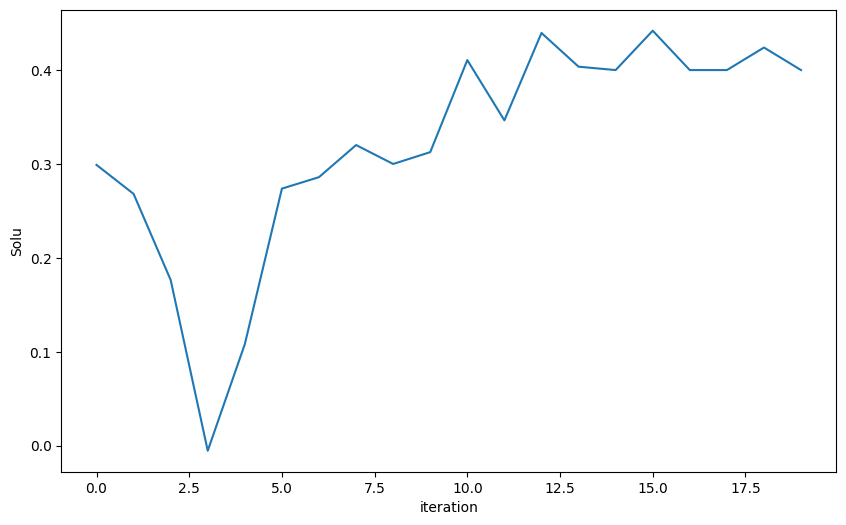

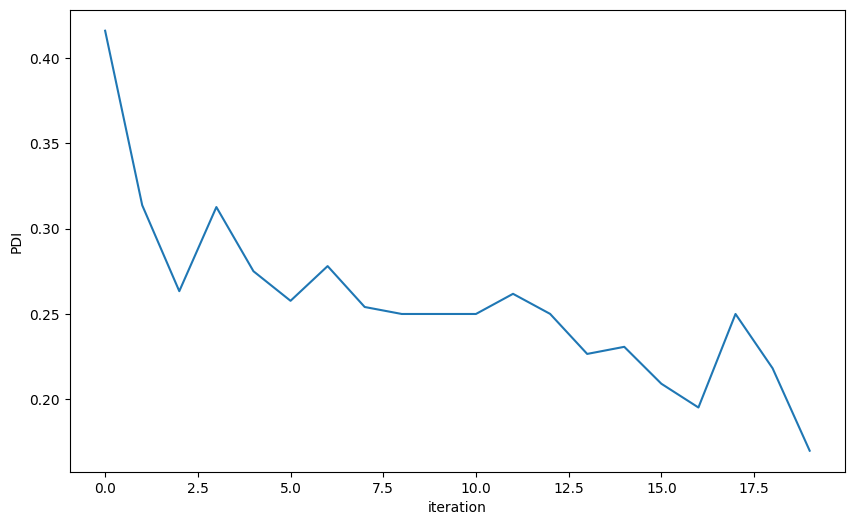

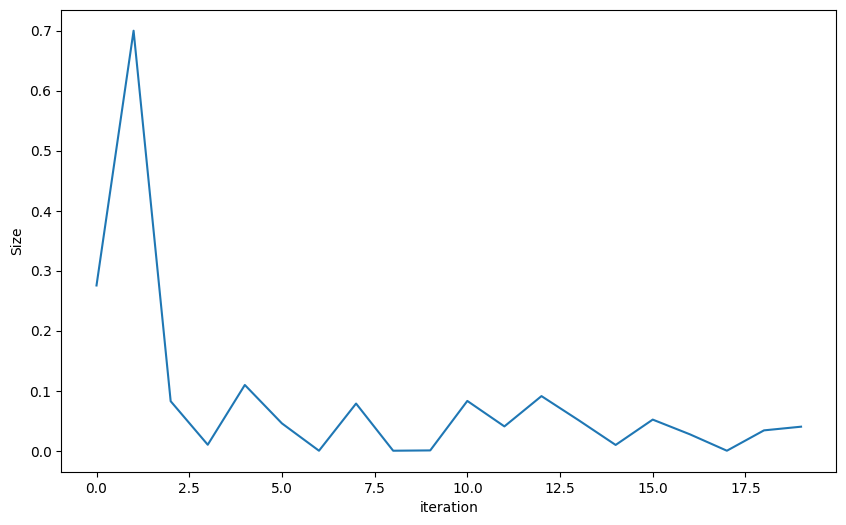

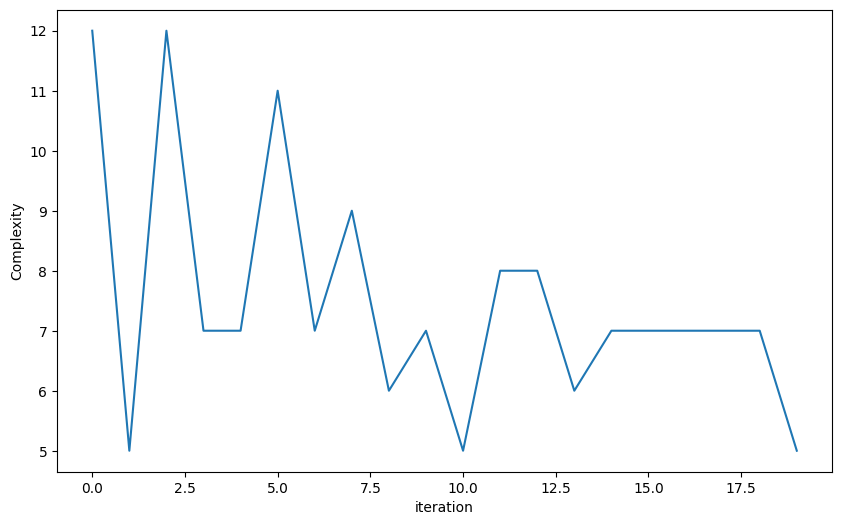

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

for obj in ['Solu', 'PDI', 'Size', 'Complexity']:

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=final_df, x='iteration', y=obj)
